In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from PIL import Image

In [2]:
# Define boundary conditions as a function
def set_boundary_conditions(V, nx, ny):
    # Set all boundaries to 0 (large plate with potential 0)
    V[:, 0] = 0  # Left boundary
    V[0, :] = 0  # Bottom boundary

    # Set Dirichlet boundary condition for removed square (potential 1)
    for i in range(ny//2, ny):
        for j in range(nx//2, nx):
            V[i, j] = 1

    # Apply Neumann boundary conditions (zero derivative)
    # Top boundary
    for j in range(1, nx-1):
        V[-1, j] = V[-2, j]
    
    # Right boundary
    for i in range(1, ny-1):
        V[i, -1] = V[i, -2]

# Solve the Laplace equation numerically
def solve_laplace(nx, ny, tol=1e-4):
    V = np.zeros((ny, nx))
    
    # Set initial boundary conditions
    set_boundary_conditions(V, nx, ny)
    
    error = tol + 1
    iterations = 0
    while error > tol:
        V_old = V.copy()
        for i in range(1, ny-1):
            for j in range(1, nx-1):
                if not (i >= ny//2 and j >= nx//2):  # Skip removed square
                    V[i, j] = 0.25 * (V_old[i+1, j] + V[i-1, j] + V_old[i, j+1] + V[i, j-1])

        # Reapply boundary conditions after updating
        set_boundary_conditions(V, nx, ny)

        error = np.max(np.abs(V - V_old))
        iterations += 1

    return V, iterations


# Compute the electric field
def compute_electric_field(V, dx, dy):
    Ex = - (V[2:, 1:-1] - V[:-2, 1:-1]) / (2 * dx)
    Ey = - (V[1:-1, 2:] - V[1:-1, :-2]) / (2 * dy)
    return Ex, Ey

# Function to compute time to equilibrium for different mesh sizes
def compute_time_to_equilibrium(mesh_sizes, tol=1e-4):
    times = []
    for size in mesh_sizes:
        nx, ny = size, size
        start_time = time.time()
        solve_laplace(nx, ny, tol)
        elapsed_time = time.time() - start_time
        times.append(elapsed_time)
    return times

In [3]:
# Define the grid
a, b = 2, 2
nx, ny = 50, 50
dx, dy = a / (nx - 1), b / (ny - 1)
x = np.linspace(0, a, nx)
y = np.linspace(0, b, ny)
X, Y = np.meshgrid(x, y)

<Figure size 1200x800 with 0 Axes>

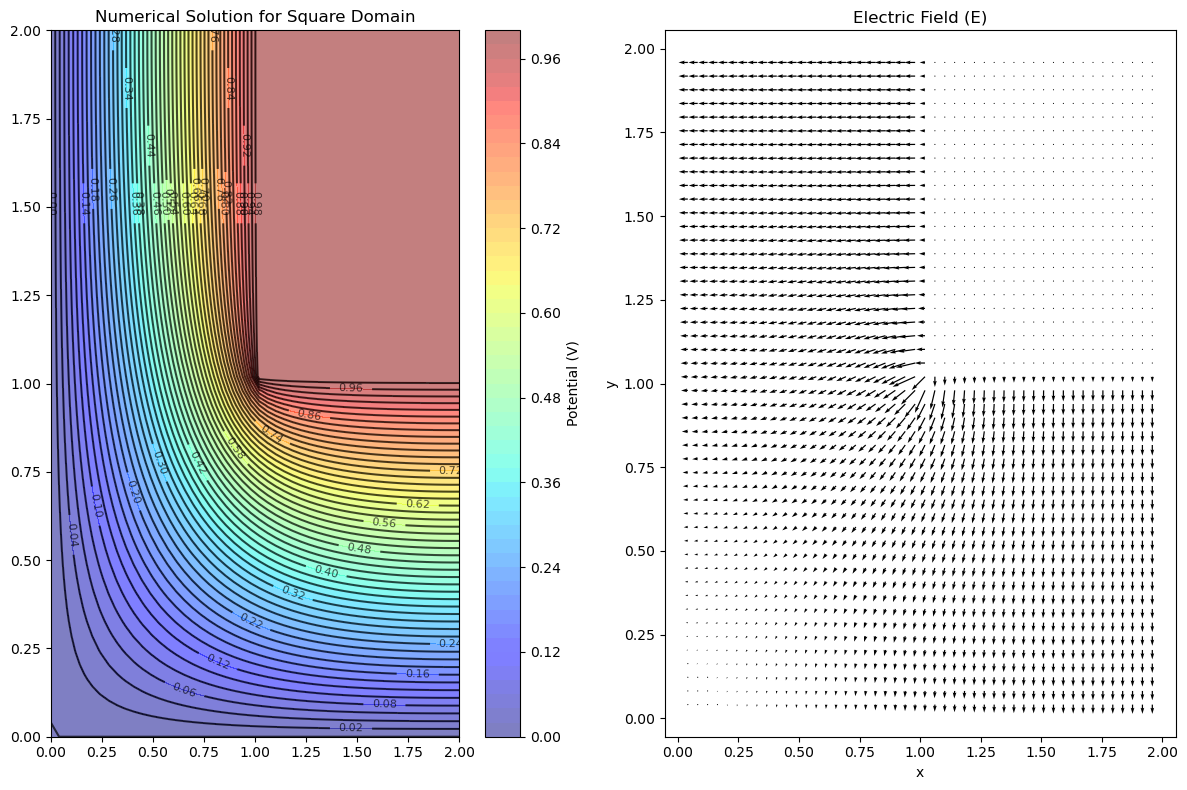

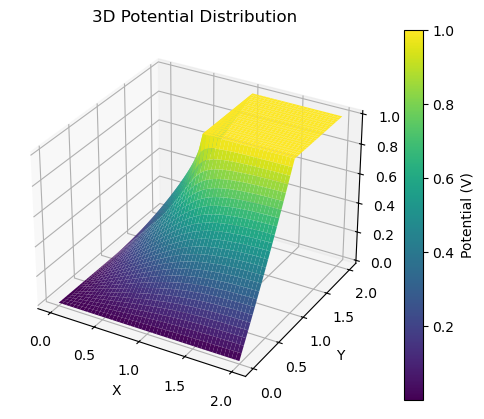

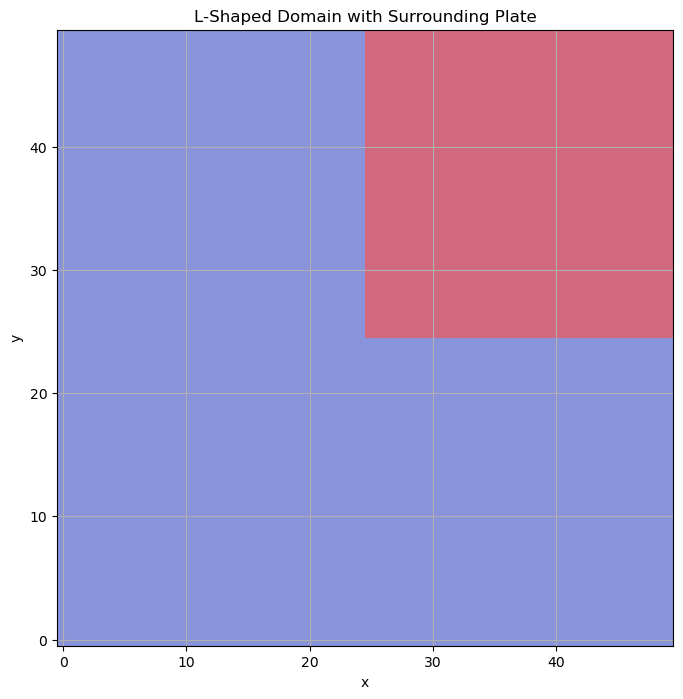

In [6]:
########    main

V_numerical, _ = solve_laplace(nx, ny)    # Compute numerical solution
Ex, Ey = compute_electric_field(V_numerical, dx, dy)    # Compute electric field components


# Plot potential and electric field
plt.figure(figsize=(12, 8))

# Contour plot of numerical solution
plt.subplot(1, 2, 1)
contour_num = plt.contourf(X, Y, V_numerical.T, 50, cmap='jet', alpha=0.5)
cbar_num = plt.colorbar(contour_num)
cbar_num.set_label('Potential (V)')
plt.title('Numerical Solution for L-Shaped Domain')
Plot potential and electric field
plt.figure(figsize=(12, 8))

# Contour plot of numerical solution with numerical values
plt.subplot(1, 2, 1)
contour_num = plt.contourf(X, Y, V_numerical.T, 50, cmap='jet', alpha=0.5)
cbar_num = plt.colorbar(contour_num)
cbar_num.set_label('Potential (V)')
plt.title('Numerical Solution for Square Domain')
# Add numerical values to the contour plot
contour_lines = plt.contour(X, Y, V_numerical.T, 50, colors='black', alpha=0.7)
plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%1.2f')


# Quiver plot of electric field
plt.subplot(1, 2, 2)
plt.quiver(X[1:-1, 1:-1], Y[1:-1, 1:-1], Ex.T, Ey.T, scale=50)
plt.title('Electric Field (E)')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

# Plot 3D potential distribution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, V_numerical.T, cmap='viridis')
fig.colorbar(surf, ax=ax, label='Potential (V)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
ax.set_title('3D Potential Distribution')
plt.show()

# Plot the entire system with the larger plate
plt.figure(figsize=(8, 8))
mesh_plot = np.zeros((ny, nx))
for i in range(ny):
    for j in range(nx):
        if i >= ny//2 and j >= nx//2:
            mesh_plot[i, j] = 1  # Yellow (L-shaped part)
        else:
            mesh_plot[i, j] = 0  # Blue (rest of the mesh)
plt.imshow(mesh_plot.T, origin='lower', cmap='coolwarm', alpha=0.6)
plt.title('L-Shaped Domain with Surrounding Plate')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define boundary conditions as a function
def set_boundary_conditions(V, nx, ny):
    V[:, 0] = 0  # Left boundary (potential 0)
    V[0, :] = 0  # Bottom boundary (potential 0)
    V[:, -1] = 0  # Right boundary (potential 0)
    # Apply Dirichlet boundary conditions (dielectric regions)
    dielectric_potential = 1.0  # Example value for dielectric potential
    V[-1, :] = np.linspace(0, dielectric_potential, nx)  # Top boundary (linear potential)

# Solve the Laplace equation numerically using the given update formula
def solve_laplace(nx, ny, tol=1e-4):
    V = np.zeros((ny, nx))
    set_boundary_conditions(V, nx, ny)
    error = tol + 1
    iterations = 0
    while error > tol:
        V_old = V.copy()
        for i in range(1, ny-1):
            for j in range(1, nx-1):
                V[i, j] = 0.25 * (V_old[i+1, j] + V[i-1, j] + V_old[i, j+1] + V[i, j-1])
        set_boundary_conditions(V, nx, ny)
        error = np.max(np.abs(V - V_old))
        iterations += 1
    return V, iterations

# Compute the electric field
def compute_electric_field(V, dx, dy):
    Ex = - (V[2:, 1:-1] - V[:-2, 1:-1]) / (2 * dx)
    Ey = - (V[1:-1, 2:] - V[1:-1, :-2]) / (2 * dy)
    return Ex, Ey

# Solve the Laplace equation numerically and capture potential over time
def solve_laplace_with_time(nx, ny, tol=1e-4):
    V = np.zeros((ny, nx))
    set_boundary_conditions(V, nx, ny)
    error = tol + 1
    V_over_time = [V.copy()]
    while error > tol:
        V_old = V.copy()
        for i in range(1, ny-1):
            for j in range(1, nx-1):
                V[i, j] = 0.25 * (V_old[i+1, j] + V[i-1, j] + V_old[i, j+1] + V[i, j-1])
        set_boundary_conditions(V, nx, ny)
        error = np.max(np.abs(V - V_old))
        V_over_time.append(V.copy())
    return V, V_over_time

# Function to compute time to equilibrium for different mesh sizes
def compute_time_to_equilibrium(mesh_sizes, tol=1e-4):
    times = []
    for size in mesh_sizes:
        nx, ny = size, size
        start_time = time.time()
        solve_laplace(nx, ny, tol)
        elapsed_time = time.time() - start_time
        times.append(elapsed_time)
    return times

# Plotting functions
def plot_potential_and_field(V_numerical, Ex, Ey, X, Y):
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    contour_num = plt.contourf(X, Y, V_numerical.T, 50, cmap='jet', alpha=0.5)
    cbar_num = plt.colorbar(contour_num)
    cbar_num.set_label('Potential (V)')
    plt.title('Numerical Solution for Square Domain')

    for i in range(V_numerical.shape[0]):
        for j in range(V_numerical.shape[1]):
            plt.text(X[i, j], Y[i, j], f'{V_numerical[i, j]:.2f}', color='black', fontsize=8, ha='center', va='center')

    plt.subplot(1, 2, 2)
    plt.quiver(X[1:-1, 1:-1], Y[1:-1, 1:-1], Ex.T, Ey.T, scale=50)
    plt.title('Electric Field (E)')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.tight_layout()
    plt.show()

def plot_3d_potential_distribution(V_numerical, X, Y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, V_numerical.T, cmap='viridis')
    fig.colorbar(surf, ax=ax, label='Potential (V)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Potential')
    ax.set_title('3D Potential Distribution')
    plt.show()

def plot_time_to_equilibrium(mesh_sizes, times):
    plt.figure(figsize=(10, 6))
    plt.plot(mesh_sizes, times, marker='o')
    plt.xlabel('Mesh Size (nx = ny)')
    plt.ylabel('Time to Equilibrium (seconds)')
    plt.title('Time to Equilibrium vs. Mesh Size')
    plt.grid(True)
    plt.show()

def plot_potential_vs_time(V_over_time):
    V_sum = [np.sum(V) for V in V_over_time]
    plt.figure(figsize=(10, 6))
    plt.plot(V_sum, marker='o')
    plt.xlabel('Time Step')
    plt.ylabel('Total Potential')
    plt.title('Total Potential vs. Time Step')
    plt.grid(True)
    plt.show()

# Main code
a, b = 2, 2
nx, ny = 50, 50
dx, dy = a / (nx - 1), b / (ny - 1)
x = np.linspace(0, a, nx)
y = np.linspace(0, b, ny)
X, Y = np.meshgrid(x, y)

V_numerical, _ = solve_laplace(nx, ny)
Ex, Ey = compute_electric_field(V_numerical, dx, dy)

plot_potential_and_field(V_numerical, Ex, Ey, X, Y)
plot_3d_potential_distribution(V_numerical, X, Y)

mesh_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
times = compute_time_to_equilibrium(mesh_sizes)
plot_time_to_equilibrium(mesh_sizes, times)

V_numerical, V_over_time = solve_laplace_with_time(nx, ny)
plot_potential_vs_time(V_over_time)


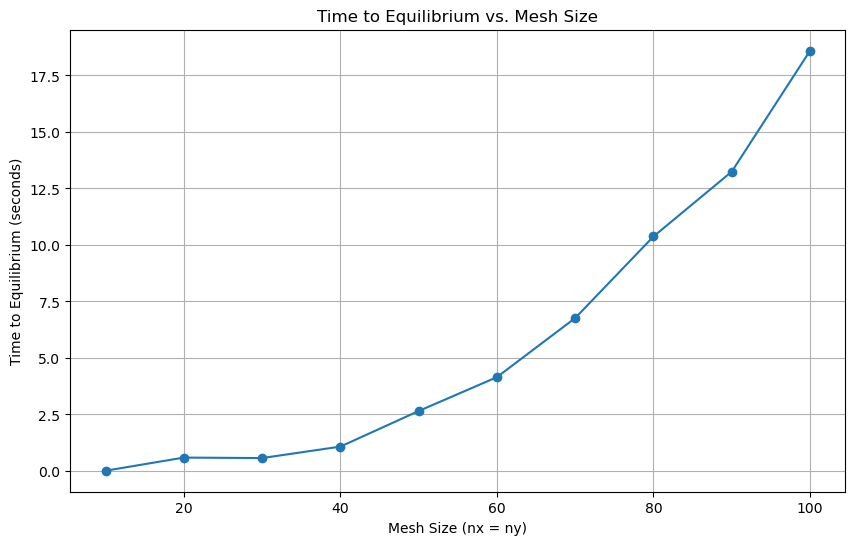

In [34]:
# Define mesh sizes and compute times
mesh_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
times = compute_time_to_equilibrium(mesh_sizes)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(mesh_sizes, times, marker='o')
plt.xlabel('Mesh Size (nx = ny)')
plt.ylabel('Time to Equilibrium (seconds)')
plt.title('Time to Equilibrium vs. Mesh Size')
plt.grid(True)
plt.show()

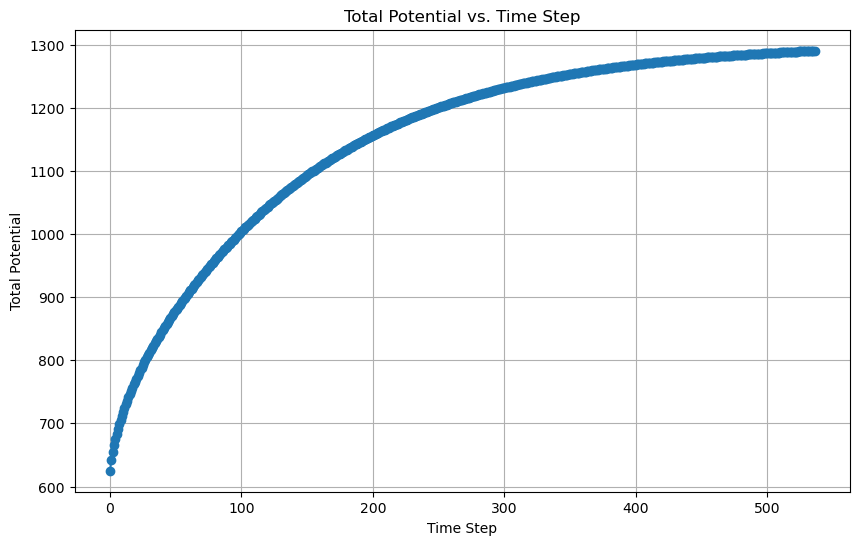

In [36]:
# Solve the Laplace equation numerically and capture potential over time
def solve_laplace_with_time(nx, ny, tol=1e-4):
    V = np.zeros((ny, nx))
    set_boundary_conditions(V, nx, ny)
    error = tol + 1
    V_over_time = [V.copy()]
    while error > tol:
        V_old = V.copy()
        for i in range(1, ny-1):
            for j in range(1, nx-1):
                if not (i >= ny//2 and j >= nx//2):
                    V[i, j] = 0.25 * (V_old[i+1, j] + V[i-1, j] + V_old[i, j+1] + V[i, j-1])
        set_boundary_conditions(V, nx, ny)
        error = np.max(np.abs(V - V_old))
        V_over_time.append(V.copy())
    return V, V_over_time

# Compute numerical solution and capture potential over time
V_numerical, V_over_time = solve_laplace_with_time(nx, ny)

# Plot potential vs. time (summed over all points)
V_sum = [np.sum(V) for V in V_over_time]
plt.figure(figsize=(10, 6))
plt.plot(V_sum, marker='o')
plt.xlabel('Time Step')
plt.ylabel('Total Potential')
plt.title('Total Potential vs. Time Step')
plt.grid(True)
plt.show()


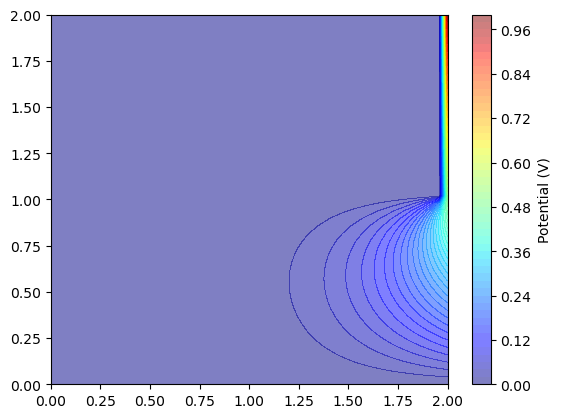

In [60]:
# Create animation of potential over time
fig, ax = plt.subplots()
contour = ax.contourf(X, Y, V_over_time[0].T, 50, cmap='jet', alpha=0.5)
cbar = plt.colorbar(contour)
cbar.set_label('Potential (V)')
plt.title('Potential Distribution Over Time')

def animate(i):
    ax.clear()
    contour = ax.contourf(X, Y, V_over_time[i].T, 50, cmap='jet', alpha=0.5)
    return contour,

ani = animation.FuncAnimation(fig, animate, frames=len(V_over_time), interval=50, blit=False)

# Save animation as GIF using Pillow
ani.save('potential_animation.gif', writer='pillow', dpi=300)
plt.show()


In [ ]:
#############################################               راستی ازمایی 

In [40]:
# Define boundary conditions as a function
def set_boundary_conditions(V, nx, ny):
    V[:, 0] = 0  # Left boundary (potential 0)
    V[0, :] = 0  # Bottom boundary (potential 0)

    # Apply Dirichlet boundary conditions (dielectric regions)
    dielectric_potential = 1.0  # Example value for dielectric potential
    V[-1, :] = np.linspace(0, dielectric_potential, nx)  # Top boundary (linear potential)
    V[:, -1] = np.linspace(0, dielectric_potential, ny)  # Right boundary (linear potential)

# Solve the Laplace equation numerically using the given update formula
def solve_laplace(nx, ny, tol=1e-4):
    V = np.zeros((ny, nx))
    
    # Set initial boundary conditions
    set_boundary_conditions(V, nx, ny)
    
    error = tol + 1
    iterations = 0
    while error > tol:
        V_old = V.copy()
        for i in range(1, ny-1):
            for j in range(1, nx-1):
                V[i, j] = 0.25 * (V_old[i+1, j] + V[i-1, j] + V_old[i, j+1] + V[i, j-1])

        # Reapply boundary conditions after updating
        set_boundary_conditions(V, nx, ny)

        error = np.max(np.abs(V - V_old))
        iterations += 1

    return V, iterations

# Compute the electric field
def compute_electric_field(V, dx, dy):
    Ex = - (V[2:, 1:-1] - V[:-2, 1:-1]) / (2 * dx)
    Ey = - (V[1:-1, 2:] - V[1:-1, :-2]) / (2 * dy)
    return Ex, Ey


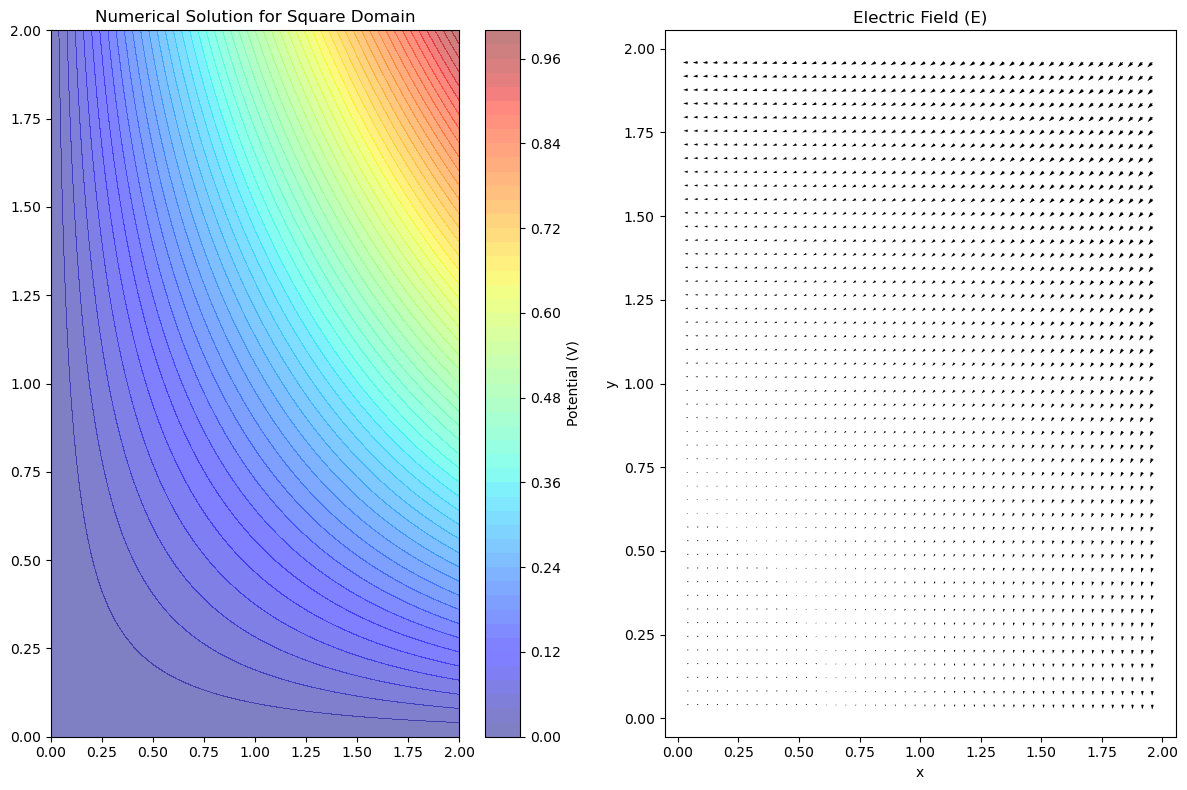

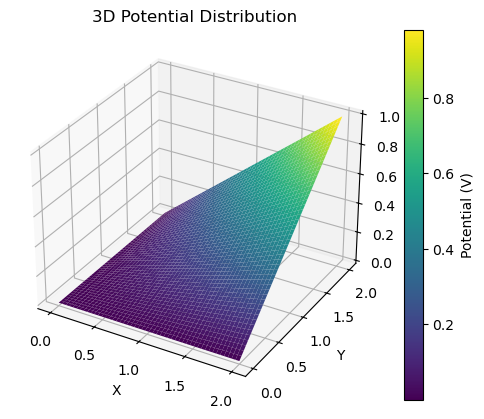

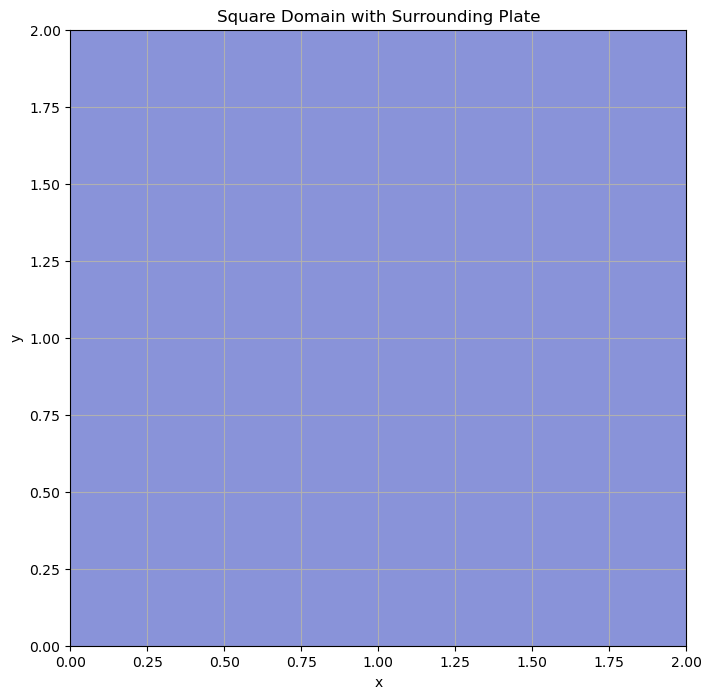

In [42]:
# Compute numerical solution
V_numerical, _ = solve_laplace(nx, ny)

# Compute electric field components
Ex, Ey = compute_electric_field(V_numerical, dx, dy)

# Plot potential and electric field
plt.figure(figsize=(12, 8))

# Contour plot of numerical solution
plt.subplot(1, 2, 1)
contour_num = plt.contourf(X, Y, V_numerical.T, 50, cmap='jet', alpha=0.5)
cbar_num = plt.colorbar(contour_num)
cbar_num.set_label('Potential (V)')
plt.title('Numerical Solution for Square Domain')

# Quiver plot of electric field
plt.subplot(1, 2, 2)
plt.quiver(X[1:-1, 1:-1], Y[1:-1, 1:-1], Ex.T, Ey.T, scale=50)
plt.title('Electric Field (E)')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

# Plot 3D potential distribution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, V_numerical.T, cmap='viridis')
fig.colorbar(surf, ax=ax, label='Potential (V)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
ax.set_title('3D Potential Distribution')
plt.show()

# Plot the entire system with the larger plate
plt.figure(figsize=(8, 8))
plt.imshow(np.zeros((ny, nx)).T, origin='lower', cmap='coolwarm', alpha=0.6, extent=[0, a, 0, b])
plt.title('Square Domain with Surrounding Plate')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

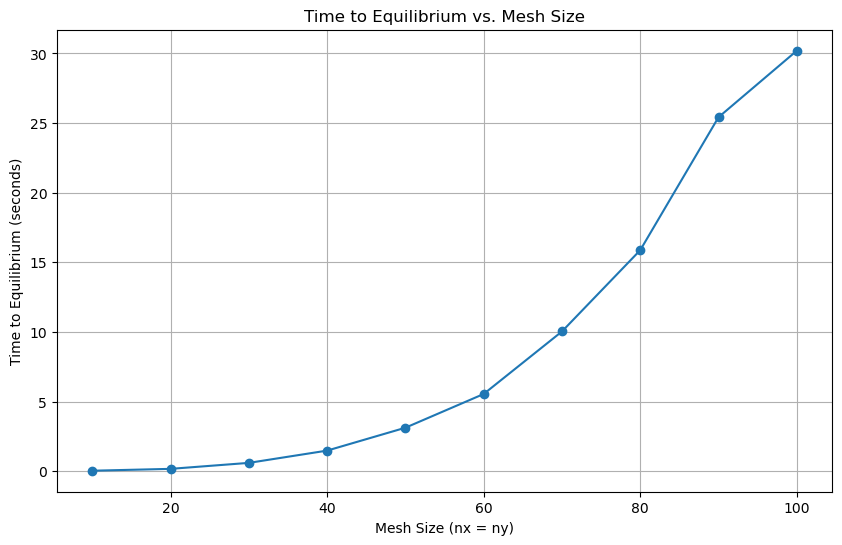

In [44]:

# Define mesh sizes and compute times
mesh_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
times = compute_time_to_equilibrium(mesh_sizes)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(mesh_sizes, times, marker='o')
plt.xlabel('Mesh Size (nx = ny)')
plt.ylabel('Time to Equilibrium (seconds)')
plt.title('Time to Equilibrium vs. Mesh Size')
plt.grid(True)
plt.show()


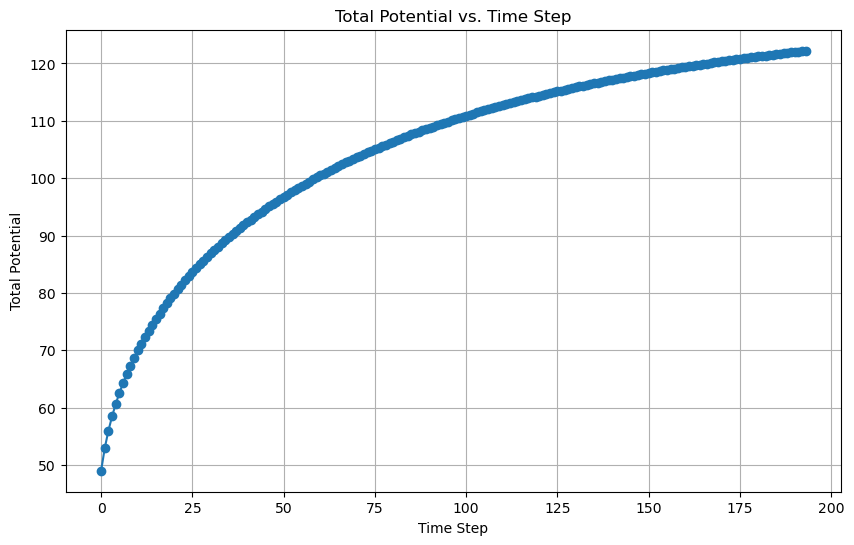

In [46]:
# Solve the Laplace equation numerically and capture potential over time
def solve_laplace_with_time(nx, ny, tol=1e-4):
    V = np.zeros((ny, nx))
    set_boundary_conditions(V, nx, ny)
    error = tol + 1
    V_over_time = [V.copy()]
    while error > tol:
        V_old = V.copy()
        for i in range(1, ny-1):
            for j in range(1, nx-1):
                if not (i >= ny//2 and j >= nx//2):
                    V[i, j] = 0.25 * (V_old[i+1, j] + V[i-1, j] + V_old[i, j+1] + V[i, j-1])
        set_boundary_conditions(V, nx, ny)
        error = np.max(np.abs(V - V_old))
        V_over_time.append(V.copy())
    return V, V_over_time

# Compute numerical solution and capture potential over time
V_numerical, V_over_time = solve_laplace_with_time(nx, ny)

# Plot potential vs. time (summed over all points)
V_sum = [np.sum(V) for V in V_over_time]
plt.figure(figsize=(10, 6))
plt.plot(V_sum, marker='o')
plt.xlabel('Time Step')
plt.ylabel('Total Potential')
plt.title('Total Potential vs. Time Step')
plt.grid(True)
plt.show()


In [47]:
#############################################              2 راستی ازمایی 

In [54]:
# Define boundary conditions as a function
def set_boundary_conditions(V, nx, ny):
    V[:, 0] = 0  # Left boundary (potential 0)
    V[0, :] = 0  # Bottom boundary (potential 0)
    V[:, -1] = 0  # Right boundary (potential 0)
    # Apply Dirichlet boundary conditions (dielectric regions)
    dielectric_potential = 1.0  # Example value for dielectric potential
    V[-1, :] = np.linspace(0, dielectric_potential, nx)  # Top boundary (linear potential)
   

# Solve the Laplace equation numerically using the given update formula
def solve_laplace(nx, ny, tol=1e-4):
    V = np.zeros((ny, nx))
    
    # Set initial boundary conditions
    set_boundary_conditions(V, nx, ny)
    
    error = tol + 1
    iterations = 0
    while error > tol:
        V_old = V.copy()
        for i in range(1, ny-1):
            for j in range(1, nx-1):
                V[i, j] = 0.25 * (V_old[i+1, j] + V[i-1, j] + V_old[i, j+1] + V[i, j-1])

        # Reapply boundary conditions after updating
        set_boundary_conditions(V, nx, ny)

        error = np.max(np.abs(V - V_old))
        iterations += 1

    return V, iterations

# Compute the electric field
def compute_electric_field(V, dx, dy):
    Ex = - (V[2:, 1:-1] - V[:-2, 1:-1]) / (2 * dx)
    Ey = - (V[1:-1, 2:] - V[1:-1, :-2]) / (2 * dy)
    return Ex, Ey


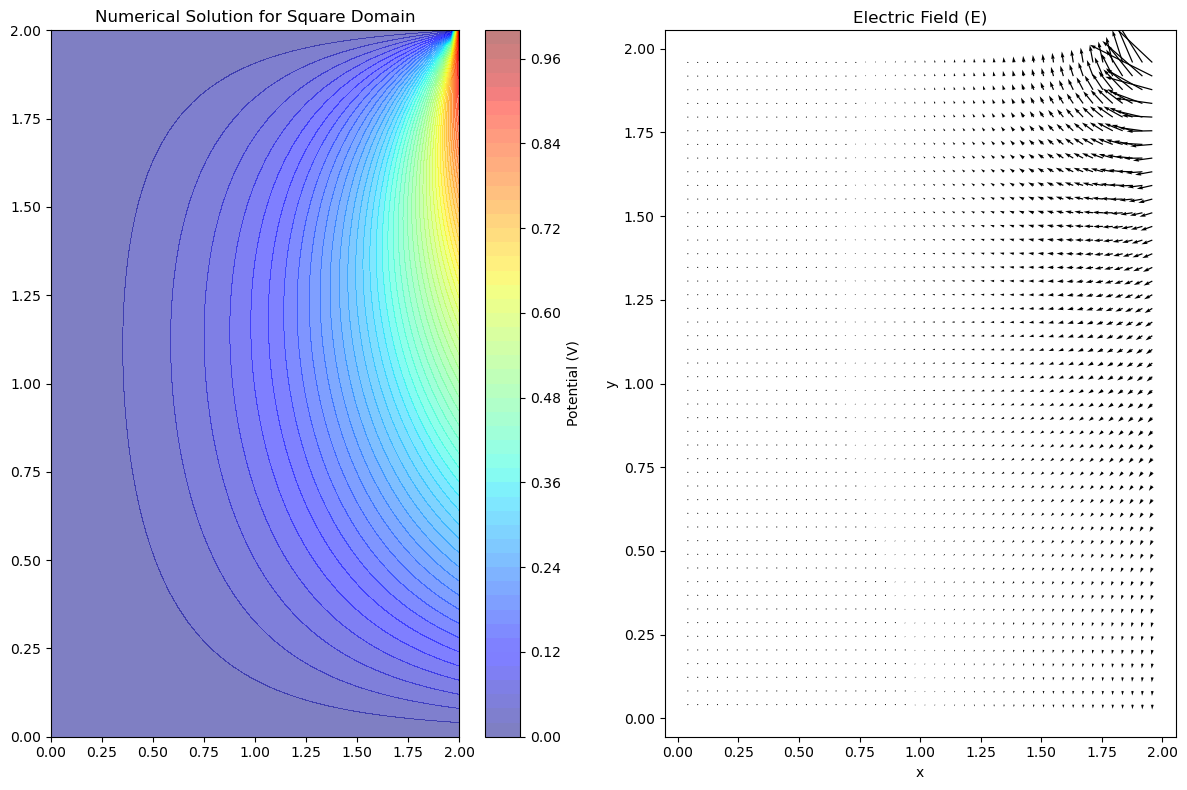

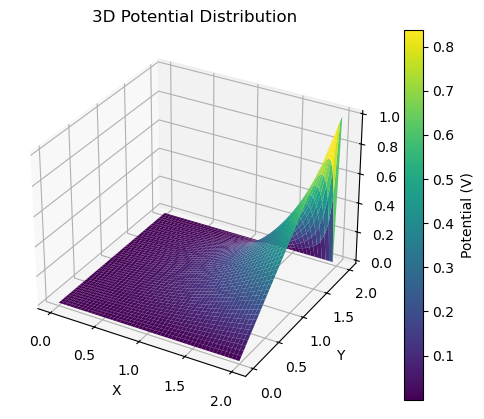

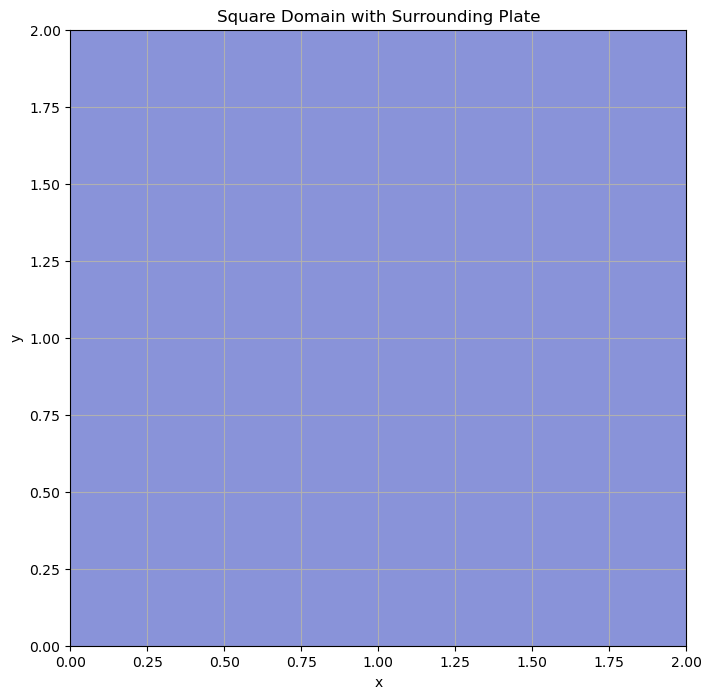

In [56]:
# Compute numerical solution
V_numerical, _ = solve_laplace(nx, ny)

# Compute electric field components
Ex, Ey = compute_electric_field(V_numerical, dx, dy)

# Plot potential and electric field
plt.figure(figsize=(12, 8))

# Contour plot of numerical solution
plt.subplot(1, 2, 1)
contour_num = plt.contourf(X, Y, V_numerical.T, 50, cmap='jet', alpha=0.5)
cbar_num = plt.colorbar(contour_num)
cbar_num.set_label('Potential (V)')
plt.title('Numerical Solution for Square Domain')

# Quiver plot of electric field
plt.subplot(1, 2, 2)
plt.quiver(X[1:-1, 1:-1], Y[1:-1, 1:-1], Ex.T, Ey.T, scale=50)
plt.title('Electric Field (E)')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

# Plot 3D potential distribution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, V_numerical.T, cmap='viridis')
fig.colorbar(surf, ax=ax, label='Potential (V)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
ax.set_title('3D Potential Distribution')
plt.show()

# Plot the entire system with the larger plate
plt.figure(figsize=(8, 8))
plt.imshow(np.zeros((ny, nx)).T, origin='lower', cmap='coolwarm', alpha=0.6, extent=[0, a, 0, b])
plt.title('Square Domain with Surrounding Plate')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [ ]:

# Define mesh sizes and compute times
mesh_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
times = compute_time_to_equilibrium(mesh_sizes)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(mesh_sizes, times, marker='o')
plt.xlabel('Mesh Size (nx = ny)')
plt.ylabel('Time to Equilibrium (seconds)')
plt.title('Time to Equilibrium vs. Mesh Size')
plt.grid(True)
plt.show()


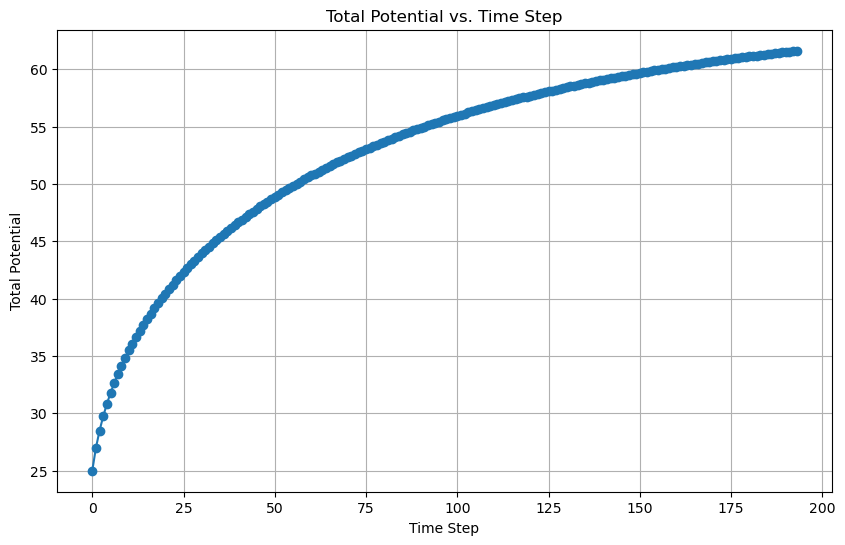

In [57]:
# Solve the Laplace equation numerically and capture potential over time
def solve_laplace_with_time(nx, ny, tol=1e-4):
    V = np.zeros((ny, nx))
    set_boundary_conditions(V, nx, ny)
    error = tol + 1
    V_over_time = [V.copy()]
    while error > tol:
        V_old = V.copy()
        for i in range(1, ny-1):
            for j in range(1, nx-1):
                if not (i >= ny//2 and j >= nx//2):
                    V[i, j] = 0.25 * (V_old[i+1, j] + V[i-1, j] + V_old[i, j+1] + V[i, j-1])
        set_boundary_conditions(V, nx, ny)
        error = np.max(np.abs(V - V_old))
        V_over_time.append(V.copy())
    return V, V_over_time

# Compute numerical solution and capture potential over time
V_numerical, V_over_time = solve_laplace_with_time(nx, ny)

# Plot potential vs. time (summed over all points)
V_sum = [np.sum(V) for V in V_over_time]
plt.figure(figsize=(10, 6))
plt.plot(V_sum, marker='o')
plt.xlabel('Time Step')
plt.ylabel('Total Potential')
plt.title('Total Potential vs. Time Step')
plt.grid(True)
plt.show()
